In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [21]:
# veri kaynağı: https://www.kaggle.com/c/titanic
df = pd.read_csv("D:\\Datasets\\titanic\\train.csv")

# 1. Veri Keşfi

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1.1. Boşluk Temizleme (trim - strip())

## 1.2. Nitelikler hakkında açıklama

In [23]:
# PassengerId: PassengerId (Yolcu numarası)
# Survived: Survival 0 = No, 1 = Yes (Kurtuldu mu?: Hedef değişken)
# Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd (Biletin sınıfı) 
        # A proxy for socio-economic status (SES)1st = Upper, 2nd = Middle 3rd = Lower
# Name: Name ad title of passenger (Yolcunun: Ünvan, İsim ve soyismi)
# Sex: Sex (Cinsiyet)
# Age: Age in years (Yaş) Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
# SibSp: number of siblings / spouses aboard the Titanic
        # sibsp: The dataset defines family relations in this way...
        # Sibling = brother, sister, stepbrother, stepsister
        # Spouse = husband, wife (mistresses and fiancés were ignored)
# Parch: number of parents / children aboard the Titanic
        # Parent = mother, father
        # Child = daughter, son, stepdaughter, stepson
        # Some children travelled only with a nanny, therefore parch=0 for them.
# Ticket: Ticket number (Bilet numarası)
# Fare: Passenger fare (Bilet ücreti)
# cabin: Cabin number
# embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) (Biniş limanı)

## 1.3. Veri seti şemasını, boş değer sayısını görme

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Age, Cabin, Embarked niteliklerinde boşluklar var.

## 1.4. Nümerik nitelikleri inceleme

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Yaş içinde 1'den küçük değerler var. Outlier gözlenmedi.

## 1.5. Kategorik nitelikleri inceleme

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# kategorik değişkenler
# 1. PassengerId: Analize dahil etmeyeceğim
# 2. Survived: hedef değişken ancak rakamla kodlanmış. Ön işleme gerektirmez.
# 3. Pclass: Rakamla kodlanmış. Ancak sıralı kategorik. Kategorik işlemi yapmak lazım.
# 4. Name: Her satırda neredeyse faklı ancak içinden ünvanlar alınabilir.
# 5. Sex
# 6. Ticket
# 7. Cabin
# 8. Embarked

Name
Sex
Ticket
Cabin
Embarked


In [27]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
# Oranları
df['Survived'].value_counts() * 100 / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

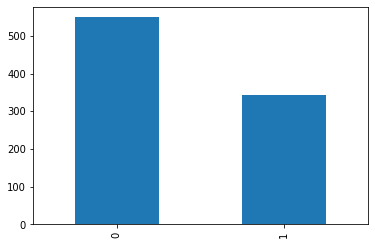

In [29]:
df['Survived'].value_counts().plot(kind='bar')
plt.show()

In [13]:
# Kurtulanlar daha az. 

In [30]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

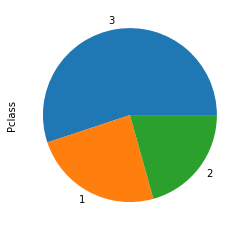

In [31]:
df['Pclass'].value_counts().plot(kind='pie')
plt.show()

In [16]:
# En kalabalık 3. sınıf, orta sınıf azınlıkta 

In [32]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [33]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [35]:
len(df['Cabin'].unique())

148

In [36]:
df['Cabin'].value_counts()[:20]

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
C22 C26        3
E101           3
F2             3
C92            2
B51 B53 B55    2
B28            2
C2             2
F4             2
B58 B60        2
C78            2
C126           2
C123           2
B77            2
E25            2
C52            2
Name: Cabin, dtype: int64

In [37]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
pd.crosstab(df['Embarked'], df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# 2. Veri Temizliği ve Ön Hazırlığı

In [20]:
# Age, Cabin, Embarked niteliklerinde boşluklar var. Şimdi onlarla ilgilenelim.

## 2.1. Age niteliğindeki boşları doldurma

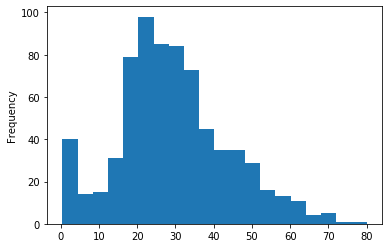

In [39]:
# yaşın dağılımına bir bakalım. Eğer normal ise ortalama değil ise ortanca ile tamamlayalım
df.Age.plot(kind='hist', bins=20)

In [22]:
# hafif sağa çarpık. Dolayısıyla ortanca kullanalım

In [40]:
# Age boşluklarını ortanca ile doldurmak için aşağıdaki kütüpheneyi kullanıyoruz
from sklearn.impute import SimpleImputer

In [41]:
# Boş bir SimpleImputer nesnesi yaratalım
imputer = SimpleImputer(strategy='median')

In [42]:
# SimpleImputer nesnesini Age ile eğitip hesaplanan ortancayı boşluklara dlduralım ve Age niteliğine atayalım
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# Age içindeki boşluklar doldu

## 2.2. Cabin niteliğindeki boşluklarla ilgilenme

In [44]:
# Cabin sütununda çok fazla kategori var. Çok boşluk var. 
# Dolayısıyla düşürüyorum.
df.drop('Cabin',axis=1,inplace=True)

In [45]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## 2.3. Embarked niteliğindeki boşluklarla ilgilenme

In [46]:
# Boş Embarked düşür.Zaten 2 boş var.
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<h4 style="color:blue";>Embarked dahil tüm boşluklar temizlendi. Şimdiye kadar sadece 2 satır ve bir sütun attık.</h4>

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2.4. Veriyi X,y olarak bölme (nitelikler matrisi ve hedef değişken - dikey bölme)

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [51]:
# Niteliklerin sıralamasını değiştirme: Hedef sona diğerleri başa
df = df[['PassengerId', 'Name', 'Ticket', 'Embarked','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch',  'Fare', 'Survived']]

In [52]:
df.head()

,PassengerId,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,"Braund, Mr. Owen Harris",A/5 21171,S,3,male,22.0,1,0,7.2500,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,1,female,38.0,1,0,71.2833,1
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,3,female,26.0,0,0,7.9250,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,1,female,35.0,1,0,53.1000,1
4,5,"Allen, Mr. William Henry",373450,S,3,male,35.0,0,0,8.0500,0


In [53]:
# 'Embarked','Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Fare'
X = df.iloc[:,3:-1].values
X.shape

(889, 7)

In [54]:
# Kontrol
X[:10]

array([['S', 3, 'male', 22.0, 1, 0, 7.25],
       ['C', 1, 'female', 38.0, 1, 0, 71.2833],
       ['S', 3, 'female', 26.0, 0, 0, 7.925],
       ['S', 1, 'female', 35.0, 1, 0, 53.1],
       ['S', 3, 'male', 35.0, 0, 0, 8.05],
       ['Q', 3, 'male', 28.0, 0, 0, 8.4583],
       ['S', 1, 'male', 54.0, 0, 0, 51.8625],
       ['S', 3, 'male', 2.0, 3, 1, 21.075],
       ['S', 3, 'female', 27.0, 0, 2, 11.1333],
       ['C', 2, 'female', 14.0, 1, 0, 30.0708]], dtype=object)

In [55]:
# En son indeks hedef değiken (Survived)
y = df.iloc[:,-1].values
y.shape

(889,)

In [56]:
# Kontrol
y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

## 2.5. Kategorik Nitelik Dönüştürme

### 2.5.1. LabelEncoder

In [58]:
# kategorik nitelikler: 'Embarked','Pclass', 'Sex' Indeksleri: 
from sklearn.preprocessing import LabelEncoder
labelencoder_embarked = LabelEncoder()
labelencoder_sex = LabelEncoder()
# Pclass zaten nümerik kodlandığı için onu burada dönüştürmeme gerek yok

In [59]:
X[:,0] = labelencoder_embarked.fit_transform(X[:,0])
X[:,2] = labelencoder_sex.fit_transform(X[:,2])

In [60]:
# LabelEncoder ile eğitilmiş nesnesinin sınıflarını görelim
print(labelencoder_embarked.classes_)
print(labelencoder_sex.classes_)

['C' 'Q' 'S']
['female' 'male']


In [61]:
X[:10]

array([[2, 3, 1, 22.0, 1, 0, 7.25],
       [0, 1, 0, 38.0, 1, 0, 71.2833],
       [2, 3, 0, 26.0, 0, 0, 7.925],
       [2, 1, 0, 35.0, 1, 0, 53.1],
       [2, 3, 1, 35.0, 0, 0, 8.05],
       [1, 3, 1, 28.0, 0, 0, 8.4583],
       [2, 1, 1, 54.0, 0, 0, 51.8625],
       [2, 3, 1, 2.0, 3, 1, 21.075],
       [2, 3, 0, 27.0, 0, 2, 11.1333],
       [0, 2, 0, 14.0, 1, 0, 30.0708]], dtype=object)

In [62]:
# X'in boyut kontrolü. Değişme olmamalı.
X.shape

(889, 7)

### 2.5.2. One Hot Encoder - ColumnTransformer

In [63]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore', categories='auto')

In [64]:
# Birden sütunu ilgilendiren dönüşümleri kolay yapabilmek için kullanışlı bir sınıf (Estimator kökenli)
# Biz burada sadece OneHotEncoder için kullanacağız.
from sklearn.compose import ColumnTransformer

In [65]:
# one_hot_encode_with_ct bizim kendi verdiğimiz isimdir. onehotencoder'ı yukarıda yarattık. [0,1,2] ise dönüşecek
# niteliklerin indeks değerleridir.
ct = ColumnTransformer(
    [('one_hot_encode_with_ct', onehotencoder, [0,1,2]),], 
    remainder='passthrough'
)

In [66]:
# ColumnTransformer nesnesi ile onehotencoder nesnesini eğitip gerekli dönüşümleri gerçekleştirip X'e tekrar atayalım.
# Burada X'in boyutu(shape) değişecektir.
X = ct.fit_transform(X)

In [67]:
X[:10]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 22.0, 1, 0, 7.25],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 38.0, 1, 0, 71.2833],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 26.0, 0, 0, 7.925],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 35.0, 1, 0, 53.1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 35.0, 0, 0, 8.05],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 28.0, 0, 0, 8.4583],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 54.0, 0, 0, 51.8625],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3, 1, 21.075],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 27.0, 0, 2, 11.1333],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 14.0, 1, 0, 30.0708]],
      dtype=object)

In [68]:
# Boyut değişmiş olmalı. Çünkü gölge değişkenler eklendi
X.shape

(889, 12)

In [52]:
# (889, 7) idi Embarked için ['C' 'Q' 'S'] ve Sex için ['female' 'male']
# toplam 5 adetgölge değişkenler eklendi ve boyut (889, 12) oldu.


### 2.5.3. Hedef değişken için Label Encoder

In [53]:
# Hedef niteliği zaten rakam olduğu için kodlamaya gerek yok.

## 2.6. Feature Scaling (Standardizasyon)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(666, 12)
(666,)
(223, 12)
(223,)


# 3. Model Oluşturma ve Eğitim

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
classifier = LogisticRegression(random_state=142, solver='lbfgs')

In [75]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=142, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 4. Predictions

In [76]:
y_pred = classifier.predict(X_test)

## 5.1. Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [77]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,1,0
1,1,1
2,0,0
3,0,1
4,1,1


# 5. Model Değerlendirme

## 5.1. Hata Matrisi (Confusion Matrix)

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[125  27]
 [ 19  52]]


## 5.2. Sınıflandırma Performansı Değerlendirme (Accuracy)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: % {:10.2f}".format(accuracy*100)) 
# :10.2f ifadesi ondalık kısımda iki basamak göstermek için

Accuracy: %      79.37


# 6. Modeli Saklama ve Tekrar Kullanma

In [67]:
# Saklamadan önce tüm veri seti ile modeli tekrar eğitelim

## 6.1. Tüm veri ile modeli son olarak eğitme

In [82]:
# Eğitim setlerinin X ve y olduğuna dikkat!!!
classifier_last = LogisticRegression(random_state=142, solver='lbfgs')
classifier_last.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=142, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Çalışırlığının basit kontrolü. Modeli tekrar okuduktan sonra bu değerle karşılaştırma yapacağız.
classifier_last.intercept_

array([-0.65610738])

## 6.2. Modeli kaydetme

In [84]:
import joblib

In [85]:
# joblib.dump(sınıflandırıcı, "/dizin/saklamak_istedigimiz_isim.pkl")
joblib.dump(classifier_last, "07.classification_with_titanic_train_data.pkl")
# Karışmasın diye notebook ismiyle aynı verdim.

['07.classification_with_titanic_train_data.pkl']

In [72]:
# Kaydedilen yere Dosya gezgini veya jupyter home'dan bir göz atalım. 

## 6.3. Modeli okuma

In [86]:
classifier_last_loaded = joblib.load("07.classification_with_titanic_train_data.pkl")

In [87]:
classifier_last_loaded.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=142, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [88]:
classifier_last_loaded.intercept_

array([-0.65610738])

In [76]:
# Kaydetmeden önceki rakam ile karşılaştırma yaparak basit bir sağlama yapıyoruz.